## Hyper Parameter Tuning

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digit= load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

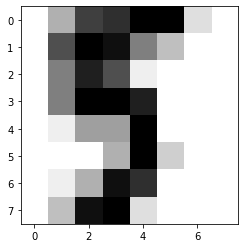

In [4]:
plt.imshow(digit.images[15], cmap='gray_r')

In [5]:
df= pd.DataFrame(digit.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target']= digit.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Split model into train and test

In [8]:
X= df.drop(['target'], axis=1)
y= df.target

In [9]:
type(y)

pandas.core.series.Series

## GridSearchCV
Using SVM classifier.

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
model= GridSearchCV(SVC(gamma= 'auto'), {
    'C' : [1,5,10],
    'kernel' : ['rbf','linear']
    }, cv= 5, return_train_score=False)

model.fit(X,y)
model.cv_results_

{'mean_fit_time': array([0.81523013, 0.08719621, 0.77560077, 0.08759885, 0.7648088 ,
        0.08859873]),
 'std_fit_time': array([0.08306418, 0.00364789, 0.02021174, 0.00257578, 0.02581308,
        0.00458908]),
 'mean_score_time': array([0.11460223, 0.02340426, 0.09319897, 0.02359338, 0.08239183,
        0.02443752]),
 'std_score_time': array([0.06086639, 0.00049428, 0.01441279, 0.00120382, 0.00049393,
        0.00212568]),
 'param_C': masked_array(data=[1, 1, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 5, 'kernel': 'rbf'},
  {'C': 5, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'}],
 'sp

In [12]:
df = pd.DataFrame(model.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.815230,0.083064,0.114602,0.060866,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,6
1,0.087196,0.003648,0.023404,0.000494,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
2,0.775601,0.020212,0.093199,0.014413,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
3,0.087599,0.002576,0.023593,0.001204,5,linear,"{'C': 5, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
4,0.764809,0.025813,0.082392,0.000494,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
5,0.088599,0.004589,0.024438,0.002126,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1


In [13]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.448545
1,1,linear,0.947697
2,5,rbf,0.476366
3,5,linear,0.947697
4,10,rbf,0.476366
5,10,linear,0.947697


In [14]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [15]:
model.best_params_

{'C': 1, 'kernel': 'linear'}

In [16]:
model.best_score_

0.9476973073351903

## RandomizedSearchCV

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
clf= RandomizedSearchCV(SVC(gamma= 'auto'), 
                        {
    'C' : [1,5,10],
    'kernel' : ['rbf','linear']
    },
                        cv= 5, return_train_score=False, n_iter= 3)


In [19]:
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([0.09279585, 0.0879981 , 0.7670032 ]),
 'std_fit_time': array([0.01349606, 0.0038989 , 0.02480403]),
 'mean_score_time': array([0.02340021, 0.02380052, 0.08639722]),
 'std_score_time': array([0.00102146, 0.00116723, 0.00789102]),
 'param_kernel': masked_array(data=['linear', 'linear', 'rbf'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[5, 1, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'C': 5},
  {'kernel': 'linear', 'C': 1},
  {'kernel': 'rbf', 'C': 5}],
 'split0_test_score': array([0.96388889, 0.96388889, 0.45277778]),
 'split1_test_score': array([0.91944444, 0.91944444, 0.46944444]),
 'split2_test_score': array([0.96657382, 0.96657382, 0.47910864]),
 'split3_test_score': array([0.9637883 , 0.9637883 , 0.47910864]),
 'split4_test_score': array([0.92479109, 0.92479109, 0.50139276]),
 'mean_test_sc

In [20]:
df1= pd.DataFrame(clf.cv_results_)[['param_C','param_kernel','mean_test_score']]
df1

,param_C,param_kernel,mean_test_score
0,5,linear,0.947697
1,1,linear,0.947697
2,5,rbf,0.476366


In [21]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_iter',
 'n_jobs',
 'n_splits_',
 'param_di

In [22]:
clf.best_params_

{'kernel': 'linear', 'C': 5}

In [23]:
clf.best_score_

0.9476973073351903

## Using Different models with GridSearchCV.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [35]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    
    'naive_bayes' : {
        'model' : GaussianNB(),
        'params' : {
            'var_smoothing' : [1e-09]
        }
    },
    
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'min_samples_leaf' : [2,6,10], 
            'min_samples_split' : [10,13,15]
        }
    },
    
    'mutlinomial' : {
        'model' : MultinomialNB(),
        'params' : {
            'alpha' : [1.5]
        }
        
    }
}

In [36]:
model_params.keys()

dict_keys(['svm', 'random_forest', 'logistic_regression', 'naive_bayes', 'decision_tree', 'mutlinomial'])

In [37]:
model_params.values()

dict_values([{'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}}, {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10]}}, {'model': LogisticRegression(solver='liblinear'), 'params': {'C': [1, 5, 10]}}, {'model': GaussianNB(), 'params': {'var_smoothing': [1e-09]}}, {'model': DecisionTreeClassifier(), 'params': {'min_samples_leaf': [2, 6, 10], 'min_samples_split': [10, 13, 15]}}, {'model': MultinomialNB(), 'params': {'alpha': [1.5]}}])

In [38]:
scores = []

for model_name, param in model_params.items():
    clf =  GridSearchCV(param['model'], param['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [39]:
scores

[{'model': 'svm',
  'best_score': 0.9476973073351903,
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.9120906839987619,
  'best_params': {'n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.9221138966264315,
  'best_params': {'C': 1}},
 {'model': 'naive_bayes',
  'best_score': 0.8069281956050759,
  'best_params': {'var_smoothing': 1e-09}},
 {'model': 'decision_tree',
  'best_score': 0.7757814917982049,
  'best_params': {'min_samples_leaf': 6, 'min_samples_split': 10}},
 {'model': 'mutlinomial',
  'best_score': 0.87090683998762,
  'best_params': {'alpha': 1.5}}]

In [40]:
df2 = pd.DataFrame(scores)
df2

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.912091,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,naive_bayes,0.806928,{'var_smoothing': 1e-09}
4,decision_tree,0.775781,"{'min_samples_leaf': 6, 'min_samples_split': 10}"
5,mutlinomial,0.870907,{'alpha': 1.5}
